In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\mannu\ML\Task 3 and 4_Loan_Data.csv')

In [3]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
df.shape

(10000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [6]:
df.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: >

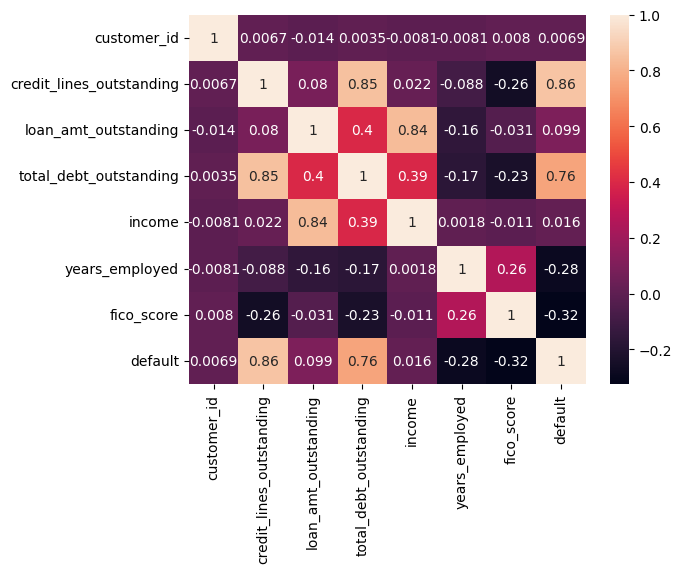

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df['fico_score'].value_counts()

fico_score
626    82
653    79
639    77
620    76
636    75
       ..
803     1
824     1
835     1
781     1
794     1
Name: count, Length: 374, dtype: int64

<Axes: xlabel='default', ylabel='credit_lines_outstanding'>

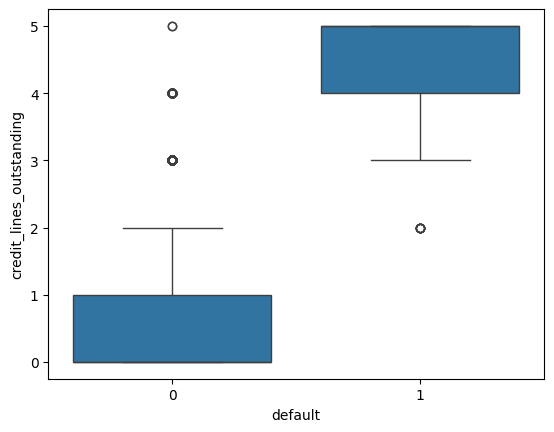

In [10]:
sns.boxplot(data=df, x= df['default'], y = df['credit_lines_outstanding'])

<Axes: xlabel='default', ylabel='total_debt_outstanding'>

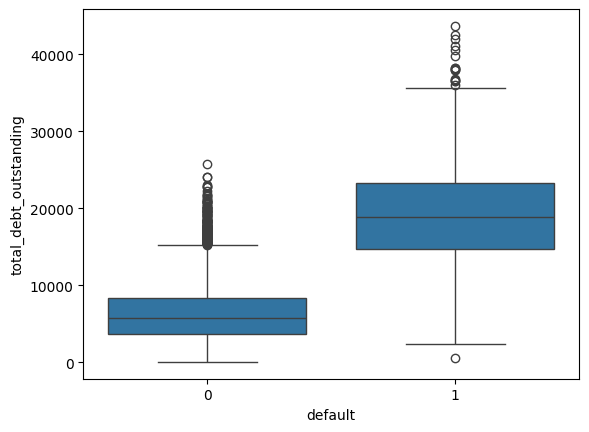

In [11]:
sns.boxplot(data=df, x=df['default'], y=df['total_debt_outstanding'])

In [12]:
df.drop('customer_id', axis=1, inplace=True)

In [13]:
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [14]:
df1 = df.copy()

In [15]:
#split data 
x = df.drop('default', axis=1)
y = df['default']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scale = scaler.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train = train_test_split(x_scale , y , test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(x_test)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
accuracy_score(y_test, y_pred)

0.99725

In [23]:
confusion_matrix(y_test, y_pred)

array([[6496,    1],
       [  21, 1482]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6497
           1       1.00      0.99      0.99      1503

    accuracy                           1.00      8000
   macro avg       1.00      0.99      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [26]:
import numpy as np

# Step 1: Get predicted probabilities
y_proba = model.predict_proba(x)[:, 1]   # 1 means 'default' class probability

# Step 2: Calculate Expected Loss
LGD = 0.1
EAD = x['loan_amt_outstanding']  # original values before scaling

expected_loss = y_proba * LGD * EAD

# Step 3: Create a small table to see results
import pandas as pd

results = pd.DataFrame({
    'PD': y_proba,
    'loan_amt_outstanding': EAD,
    'Expected_Loss': expected_loss
})

print(results.head())


    PD  loan_amt_outstanding  Expected_Loss
0  0.0           5221.545193            0.0
1  0.0           1958.928726            0.0
2  0.0           3363.009259            0.0
3  0.0           4766.648001            0.0
4  0.0           1345.827718            0.0


In [27]:
def predict_expected_loss(model, scaler, borrower_data, LGD=0.1):
    # borrower_data is a dict of feature values
    df = pd.DataFrame([borrower_data])
    
    # scale features
    scaled = scaler.transform(df)
    
    # predict probability
    pd_prob = model.predict_proba(scaled)[:, 1][0]
    
    # expected loss
    ead = borrower_data['loan_amt_outstanding']
    el = pd_prob * LGD * ead
    
    return pd_prob, el

# Example:
borrower = {
    'credit_lines_outstanding': 5,
    'loan_amt_outstanding': 50000,
    'total_debt_outstanding': 80000,
    'income': 600000,
    'years_employed': 4,
    'fico_score': 720
}

pd_prob, el = predict_expected_loss(model, scaler, borrower)
print("Probability of Default:", pd_prob)
print("Expected Loss:", el)


Probability of Default: 5.99111941053955e-07
Expected Loss: 0.0029955597052697754
